# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [218]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [220]:
# Importing the file porter_data_1.csv
porter = pd.read_csv("porter_data_1.csv")
porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [75]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [222]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time'])
porter['created_at'] = pd.to_datetime(porter['created_at'])


In [224]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [226]:
porter.describe()

market_id                     created_at  \
count  175777.000000                         175777   
mean        2.743726  2015-02-04 19:57:50.009631744   
min         1.000000            2015-01-21 15:22:03   
25%         2.000000            2015-01-29 01:31:19   
50%         2.000000            2015-02-05 02:41:26   
75%         4.000000            2015-02-12 01:04:32   
max         6.000000            2015-02-18 06:00:44   
std         1.330963                            NaN   

                actual_delivery_time  store_primary_category  order_protocol  \
count                         175777           175777.000000   175777.000000   
mean   2015-02-04 20:44:02.190406144               35.887949        2.911752   
min              2015-01-21 16:07:03                0.000000        1.000000   
25%              2015-01-29 02:16:30               18.000000        1.000000   
50%              2015-02-05 03:34:33               38.000000        3.000000   
75%              2015-02-12 01:48:24               55.000000        4.000000   
max              2015-02-18 06:51:10               72.000000        7.000000   
std                              NaN               20.728254        1.513128   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  175777.000000  175777.000000       175777.000000   175777.000000   
mean        3.204976    2697.111147            2.675060      684.965433   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   
std         2.674055    1828.554893            1.625681      519.882924   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175777.000000          175777.000000       175777.000000   
mean      1160.158616              44.918664           41.861381   
min          0.000000              -4.000000           -5.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   
std        560.828571              34.544724           32.168505   

       total_outstanding_orders       distance  
count             175777.000000  175777.000000  
mean                  58.230115      21.843090  
min                   -6.000000       0.000000  
25%                   17.000000      15.360000  
50%                   41.000000      21.760000  
75%                   85.000000      28.120000  
max                  285.000000      83.520000  
std                   52.731043       8.748712

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [228]:
# Convert categorical features to category type
porter['store_primary_category']=porter['store_primary_category'].astype('category').cat.codes
porter['order_protocol']=porter['order_protocol'].astype('category').cat.codes

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [230]:
# Calculate time taken in minutes
porter["time_taken"] = porter["actual_delivery_time"]-porter["created_at"]
porter['time_taken_mins']=pd.to_timedelta(porter['time_taken'])/pd.Timedelta('60s')

In [232]:
porter.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               0            4      3441                   4             557   
1               1            1      1900                   1            1400   
2               2            4      4771                   3             820   
3               0            1      1525                   1            1525   
4               0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance      time_taken  time_taken_mins  
0                      21.0     34.44 0 days 00:47:00             47.0  
1                       2.0     27.60 0 days 00:44:00             44.0  
2                      18.0     11.56 0 days 00:55:00             55.0  
3                       8.0     31.80 0 days 00:59:00             59.0  
4                       7.0      8.20 0 days 00:46:00             46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [234]:
# Extract the hour and day of week from the 'created_at' timestamp
porter["order_hour"] = porter["created_at"].dt.hour

# Create a categorical feature 'isWeekend'
porter["day_of_week"] = porter["created_at"].dt.day_name()
weekend = ['Saturday','Sunday']
porter["isWeekend"] = porter.day_of_week.apply(lambda x : 1 if x in weekend else 0)


In [236]:
# Drop unnecessary columns
porter = porter.drop(['actual_delivery_time','time_taken','created_at'],axis=1)

In [238]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   store_primary_category    175777 non-null  int8   
 2   order_protocol            175777 non-null  int8   
 3   total_items               175777 non-null  int64  
 4   subtotal                  175777 non-null  int64  
 5   num_distinct_items        175777 non-null  int64  
 6   min_item_price            175777 non-null  int64  
 7   max_item_price            175777 non-null  int64  
 8   total_onshift_dashers     175777 non-null  float64
 9   total_busy_dashers        175777 non-null  float64
 10  total_outstanding_orders  175777 non-null  float64
 11  distance                  175777 non-null  float64
 12  time_taken_mins           175777 non-null  float64
 13  order_hour                175777 non-null  i

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [66]:
porter.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken_mins', 'order_hour',
       'isWeekend'],
      dtype='object')

In [947]:
# Define target variable (y) and features (X)
X = porter[['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour',
       'isWeekend','day_of_week','time_taken_mins']]
y=porter["time_taken_mins"]


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [949]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [957]:
# Define numerical and categorical columns for easy EDA and data manipulation

num_columns = X_train[['total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance']]
cat_columns = X_train[[ 'market_id','store_primary_category', 'order_protocol','isWeekend','order_hour','day_of_week']]

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

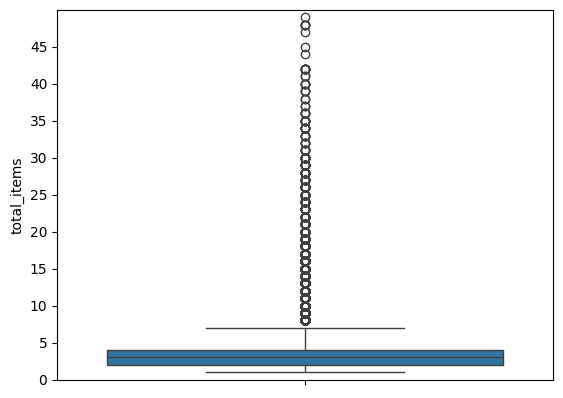

In [39]:
# Plot distributions for all numerical columns
#sns.pairplot(X_train,x_vars=X_train, y_vars=y_train,size=4, aspect=1, kind='scatter')
sns.boxplot(porter['total_items'])
plt.ylim(0,50)
plt.yticks(np.arange(0,50,5))
plt.show()


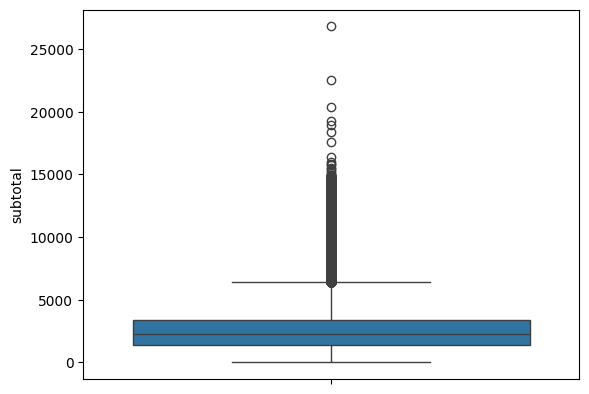

In [43]:
sns.boxplot(porter['subtotal'])
plt.show()

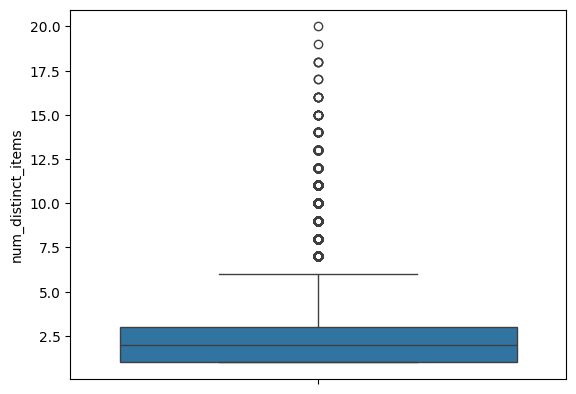

In [45]:
sns.boxplot(porter['num_distinct_items'])
plt.show()

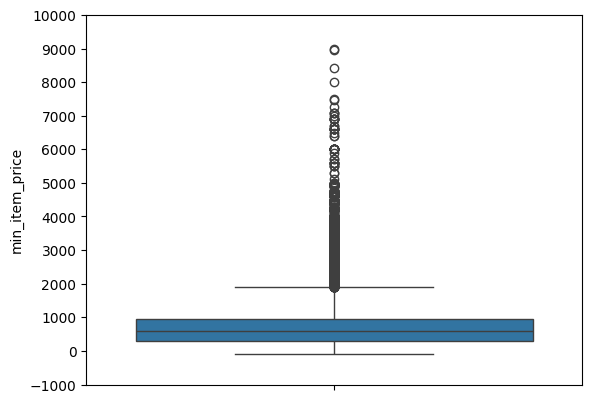

In [59]:
sns.boxplot(porter['min_item_price'])
plt.ylim(-500,10000)
plt.yticks(np.arange(-1000,11000,1000))
plt.show()

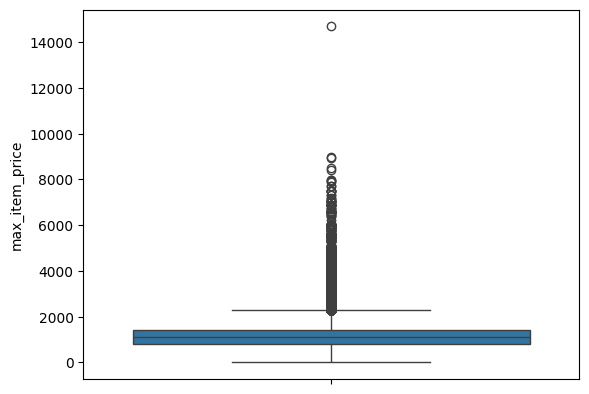

In [61]:
sns.boxplot(porter['max_item_price'])
plt.show()

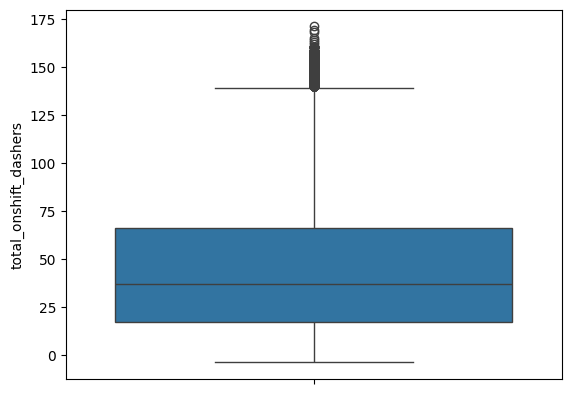

In [63]:
sns.boxplot(porter['total_onshift_dashers'])
#plt.ylim(-500,10000)
#plt.yticks(np.arange(-1000,11000,1000))
plt.show()

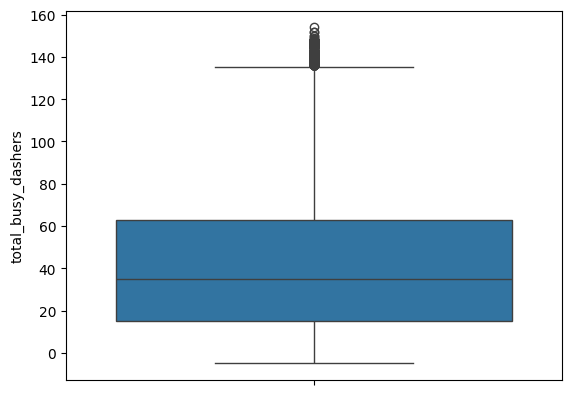

In [65]:
sns.boxplot(porter['total_busy_dashers'])
#plt.ylim(-500,10000)
#plt.yticks(np.arange(-1000,11000,1000))
plt.show()

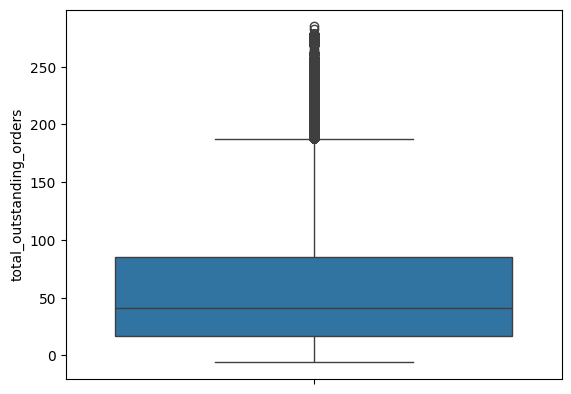

In [69]:
sns.boxplot(porter['total_outstanding_orders'])
#plt.ylim(-500,10000)
#plt.yticks(np.arange(-1000,11000,1000))
plt.show()

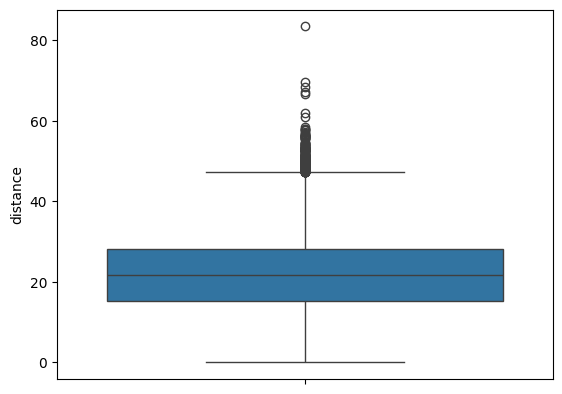

In [71]:
sns.boxplot(porter['distance'])
#plt.ylim(-500,10000)
#plt.yticks(np.arange(-1000,11000,1000))
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [955]:
# Distribution of categorical columns


In [23]:
X_train['store_primary_category'].value_counts()


store_primary_category
4     12661
55    10981
46    10886
13     6922
58     6334
      ...  
56        5
43        3
21        1
8         1
3         1
Name: count, Length: 73, dtype: int64

In [31]:
X_train['store_primary_category'].unique().size

73

In [33]:
X_train['order_protocol'].value_counts()

order_protocol
0    33821
2    33067
4    29060
1    14629
3    11996
5      457
6       13
Name: count, dtype: int64

In [59]:
X_train['day_of_week'].value_counts()

day_of_week
Saturday     21711
Sunday       20857
Friday       17590
Monday       16826
Thursday     15777
Wednesday    15242
Tuesday      15040
Name: count, dtype: int64

In [61]:
X_train['order_hour'].value_counts()

order_hour
2     23103
1     18040
3     16442
20     9676
4      9216
19     8453
0      8103
21     7125
22     5544
23     5138
5      4296
18     3183
17     2134
16     1369
6       853
15      334
14       26
7         6
8         2
Name: count, dtype: int64

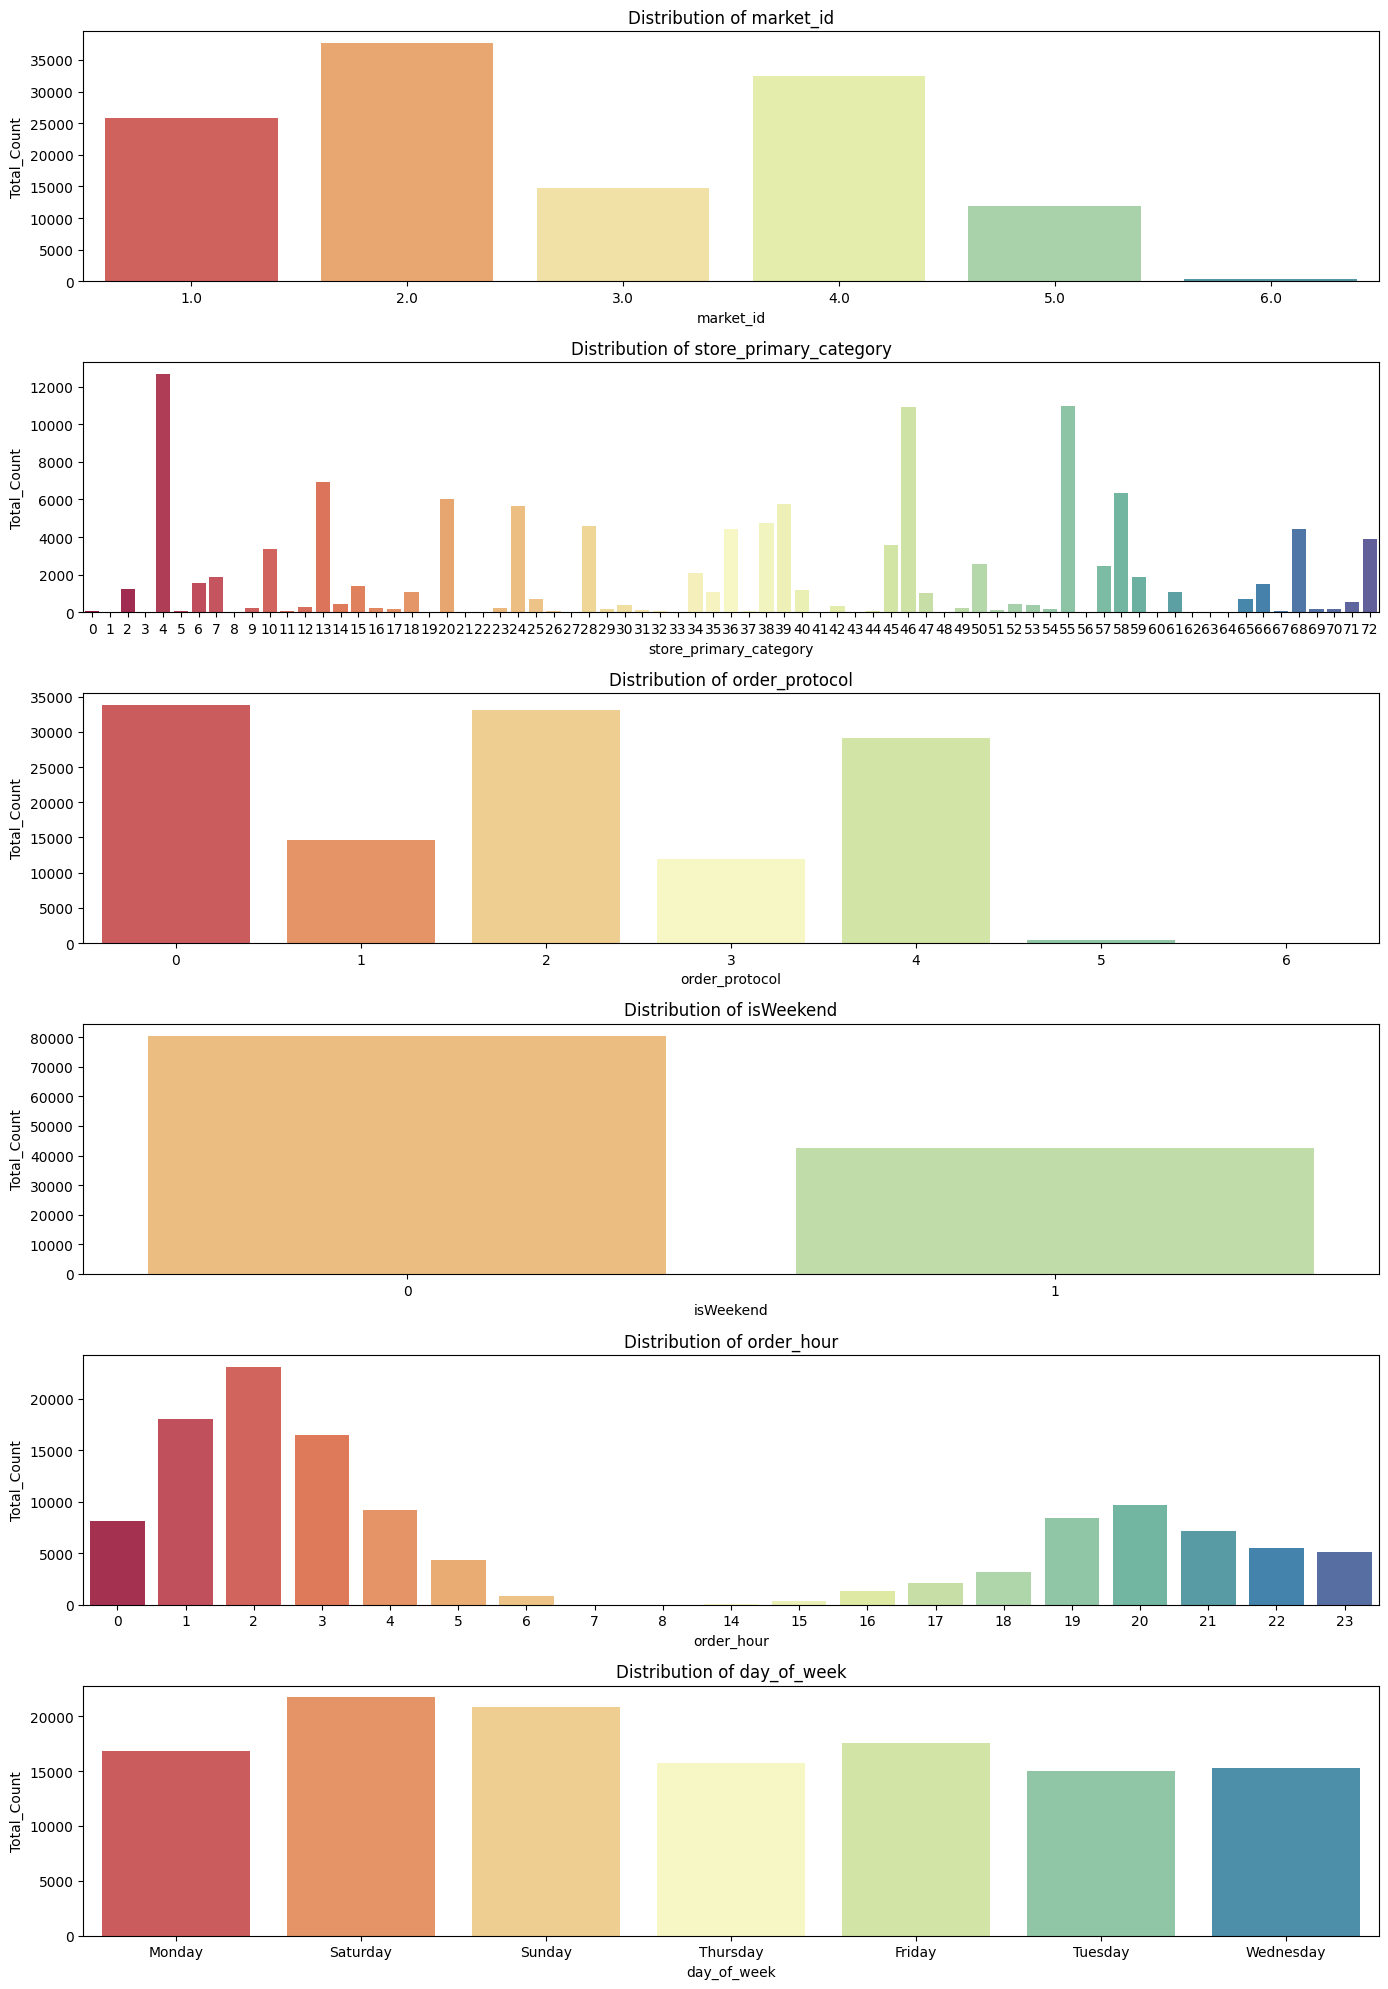

In [965]:
plt.figure(figsize=(14, 20))
for i, col in enumerate(cat_columns.columns):
    plt.subplot(6, 1, i + 1)
    sns.countplot(x=X_train[col], palette='Spectral')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Total_Count')

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

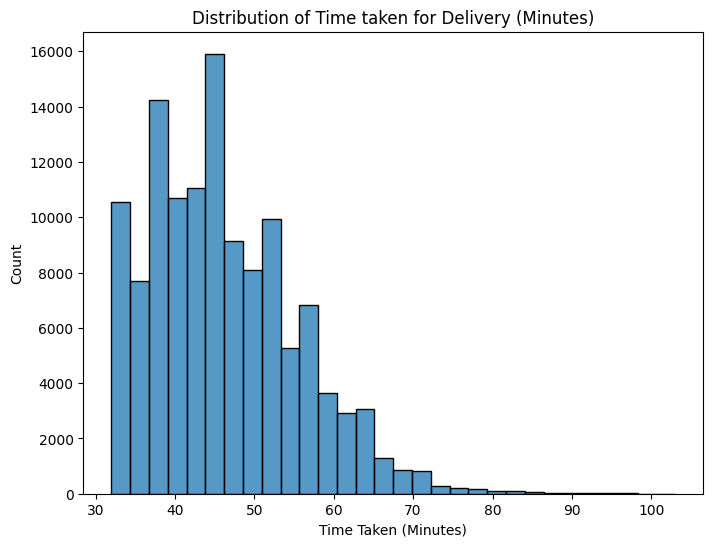

In [959]:
# Distribution of time_taken
plt.figure(figsize=(8, 6))
sns.histplot(y_train,bins=30)
plt.title('Distribution of Time taken for Delivery (Minutes)')
plt.xlabel('Time Taken (Minutes)')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

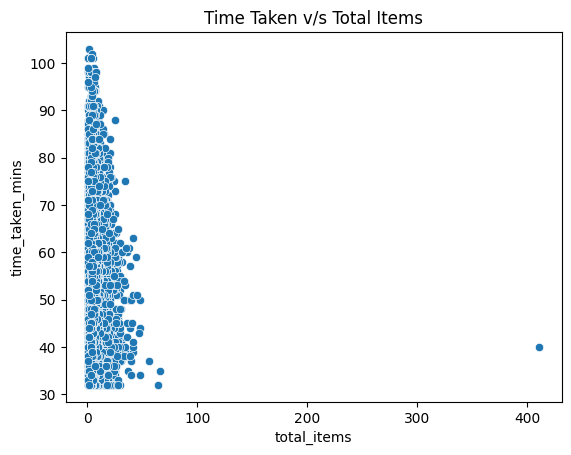

In [967]:
sns.scatterplot(x = X_train['total_items'],y=y_train)
plt.title("Time Taken v/s Total Items")
plt.show()

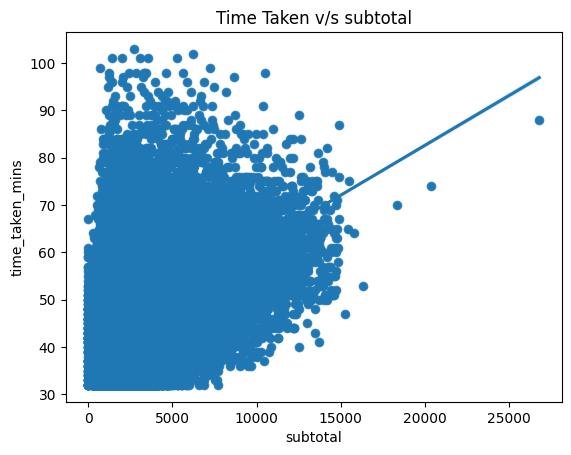

In [970]:
sns.scatterplot(x = X_train['subtotal'],y=y_train)
sns.regplot(x = X_train['subtotal'],y=y_train)
plt.title("Time Taken v/s subtotal")
plt.show()

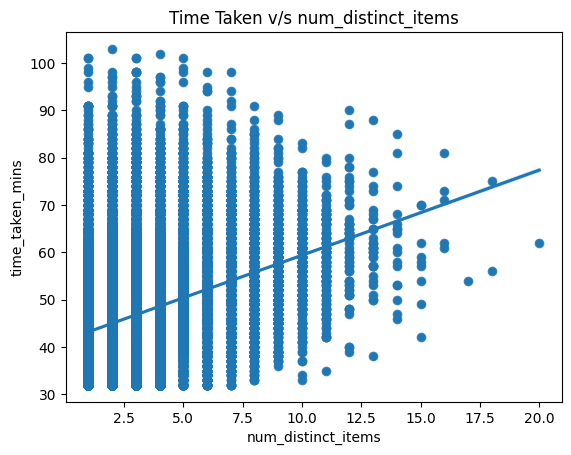

In [972]:
sns.scatterplot(x = X_train['num_distinct_items'],y=y_train)
sns.regplot(x = X_train['num_distinct_items'],y=y_train)
plt.title("Time Taken v/s num_distinct_items")
plt.show()

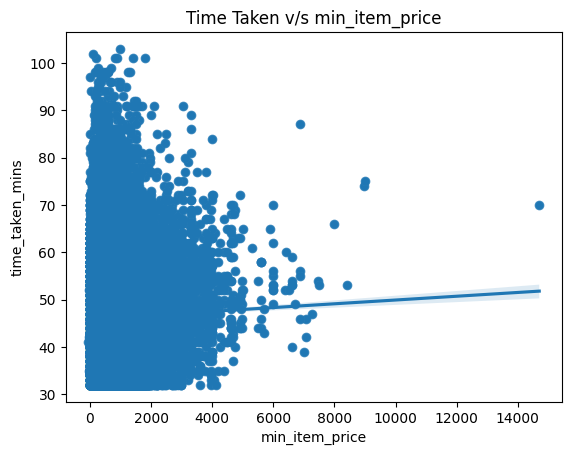

In [974]:
sns.scatterplot(x = X_train['min_item_price'],y=y_train)
sns.regplot(x = X_train['min_item_price'],y=y_train)
plt.title("Time Taken v/s min_item_price")
plt.show()

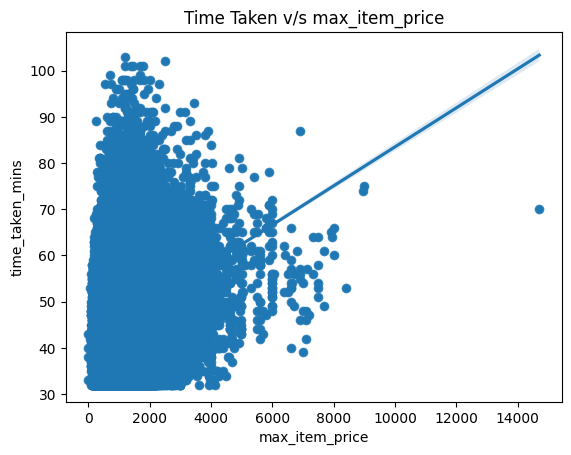

In [975]:
sns.scatterplot(x = X_train['max_item_price'],y=y_train)
sns.regplot(x = X_train['max_item_price'],y=y_train)
plt.title("Time Taken v/s max_item_price")
plt.show()

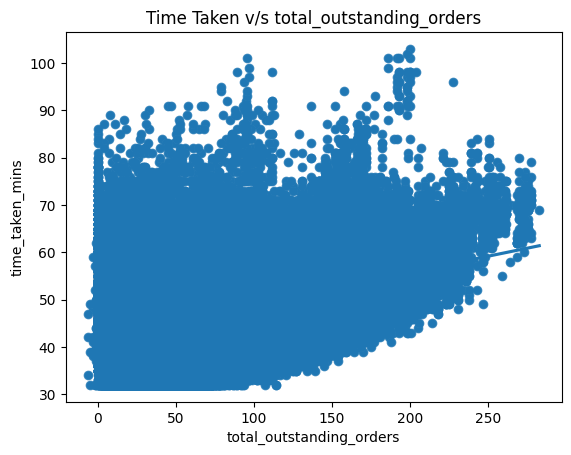

In [977]:
sns.scatterplot(x = X_train['total_outstanding_orders'],y=y_train)
sns.regplot(x = X_train['total_outstanding_orders'],y=y_train)
plt.title("Time Taken v/s total_outstanding_orders")
plt.show()

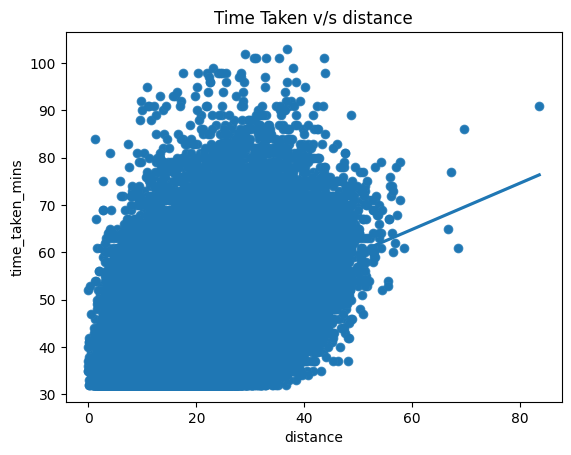

In [978]:
sns.scatterplot(x = X_train['distance'],y=y_train)
sns.regplot(x = X_train['distance'],y=y_train)
plt.title("Time Taken v/s distance")
plt.show()


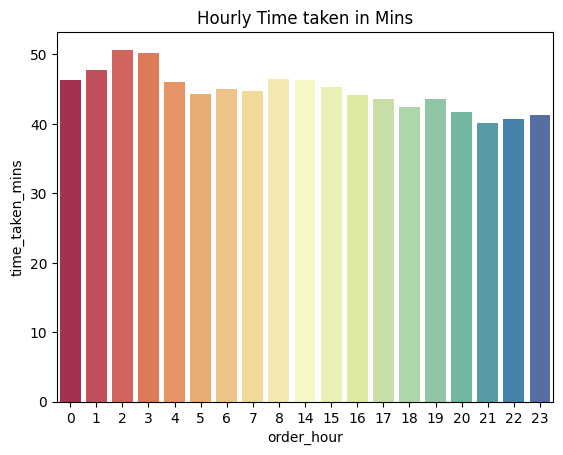

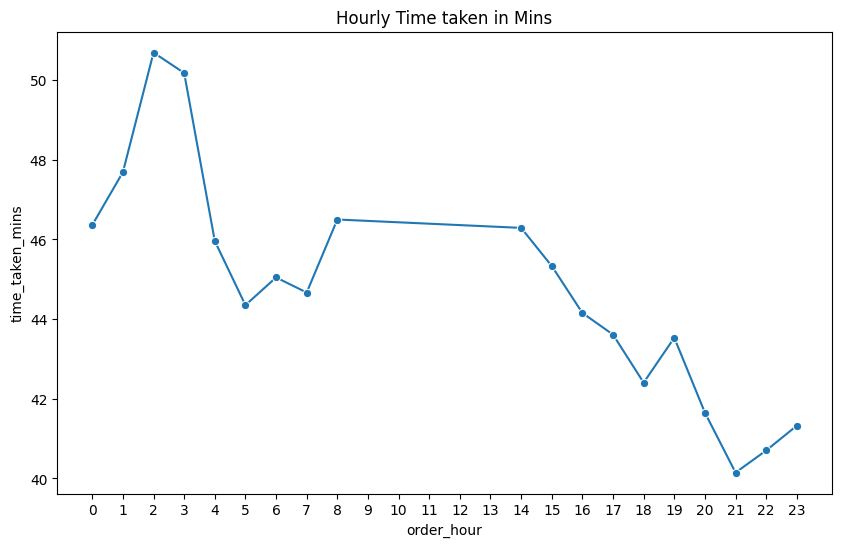

In [982]:
# Show the distribution of time_taken for different hours
hourly_time_taken = porter.groupby('order_hour')['time_taken_mins'].mean().reset_index()
sns.barplot(data=hourly_time_taken,x='order_hour',y='time_taken_mins',palette='Spectral',ci=0)
plt.title('Hourly Time taken in Mins')
plt.show()

plt.figure(figsize=(10, 6))
line_plot= sns.lineplot(data=hourly_time_taken,x='order_hour',y='time_taken_mins',marker='o',palette='Spectral')
plt.xticks(range(24))
plt.title('Hourly Time taken in Mins')
plt.show()


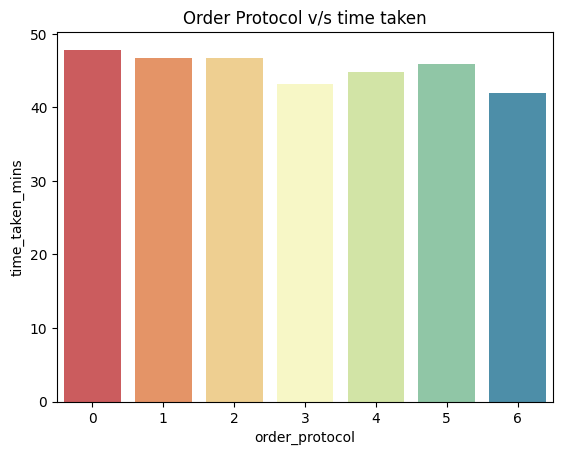

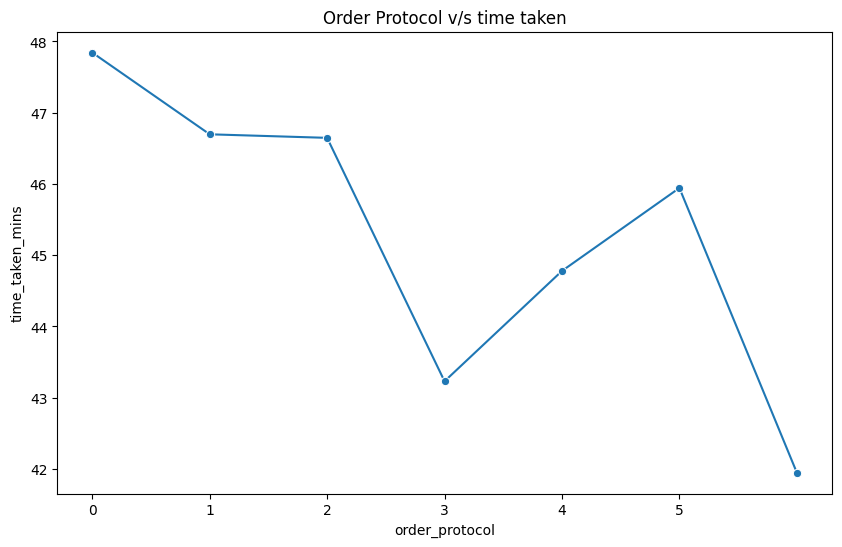

In [984]:
hourly_time_taken = porter.groupby('order_protocol')['time_taken_mins'].mean().reset_index()
sns.barplot(data=hourly_time_taken,x='order_protocol',y='time_taken_mins',palette='Spectral',ci=0)
plt.title('Order Protocol v/s time taken')
plt.show()

plt.figure(figsize=(10, 6))
line_plot= sns.lineplot(data=hourly_time_taken,x='order_protocol',y='time_taken_mins',marker='o',palette='Spectral')
plt.xticks(range(6))
plt.title('Order Protocol v/s time taken')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [97]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   store_primary_category    175777 non-null  int8   
 2   order_protocol            175777 non-null  int8   
 3   total_items               175777 non-null  int64  
 4   subtotal                  175777 non-null  int64  
 5   num_distinct_items        175777 non-null  int64  
 6   min_item_price            175777 non-null  int64  
 7   max_item_price            175777 non-null  int64  
 8   total_onshift_dashers     175777 non-null  float64
 9   total_busy_dashers        175777 non-null  float64
 10  total_outstanding_orders  175777 non-null  float64
 11  distance                  175777 non-null  float64
 12  time_taken_mins           175777 non-null  float64
 13  order_hour                175777 non-null  i

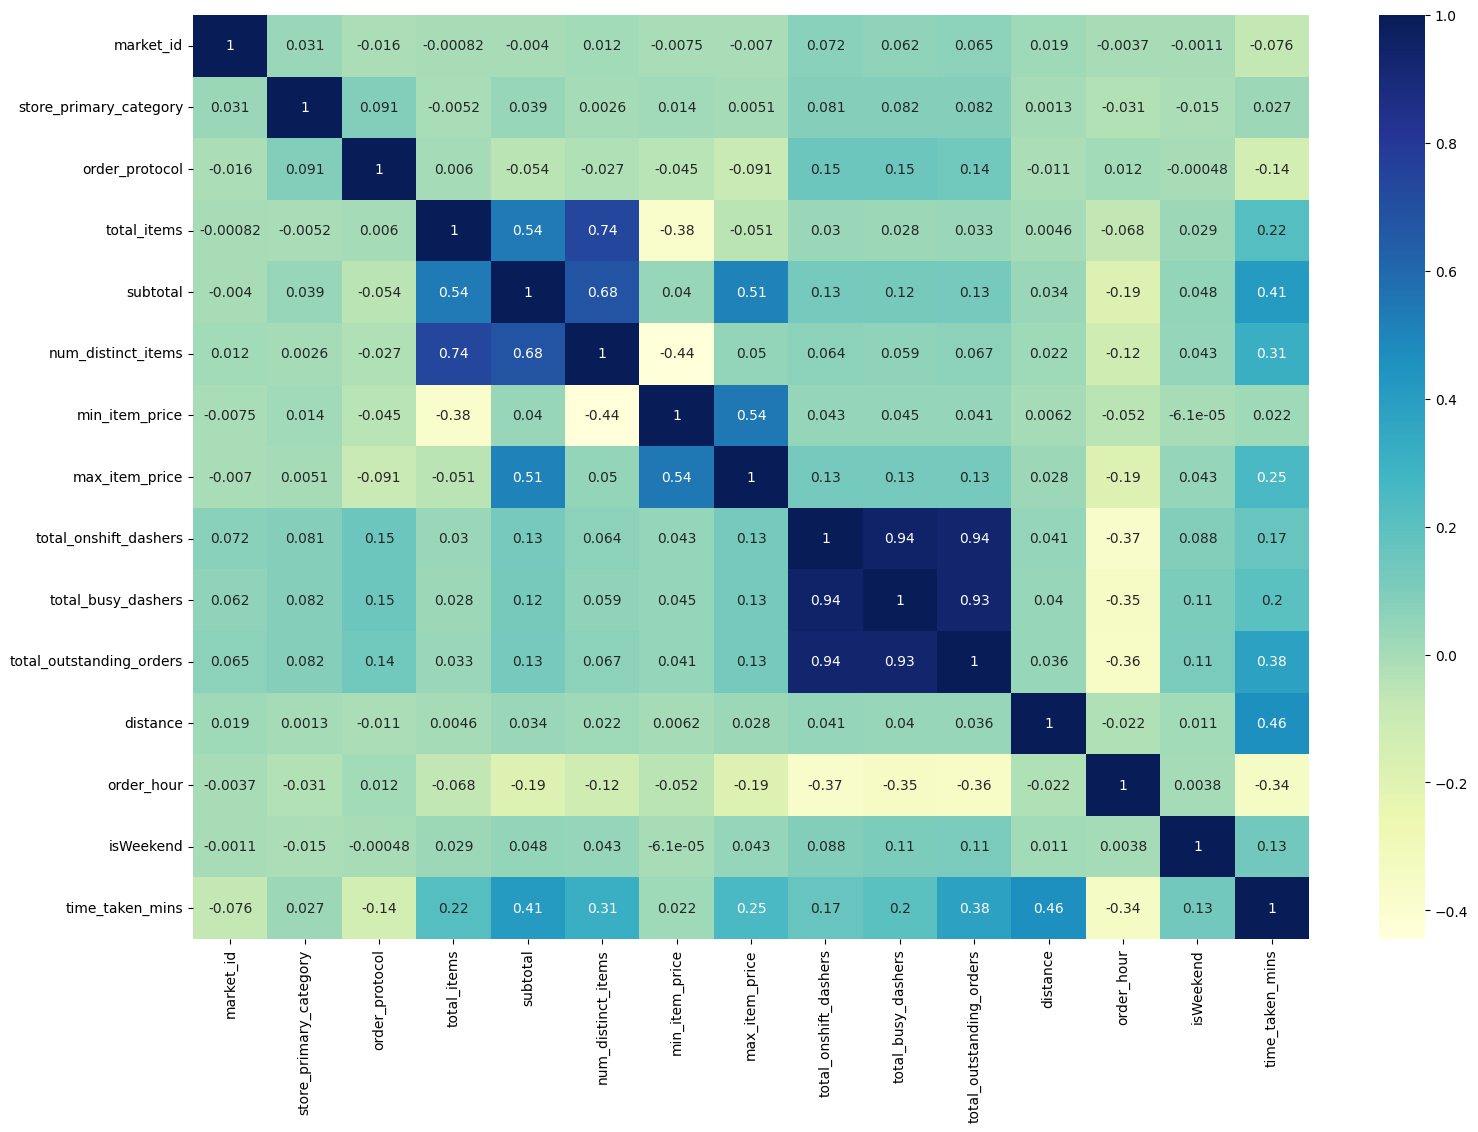

In [861]:
# Plot the heatmap of the correlation matrix
X_train= X_train.drop('day_of_week',axis=1)
plt.figure(figsize=(18,12))
sns.heatmap(X_train.corr(), cmap="YlGnBu", annot = True)
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [863]:
# Drop 3-5 weakly correlated columns from training dataset
X_train=X_train.drop(["market_id","store_primary_category","min_item_price"],axis=1)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

<Axes: ylabel='time_taken_mins'>

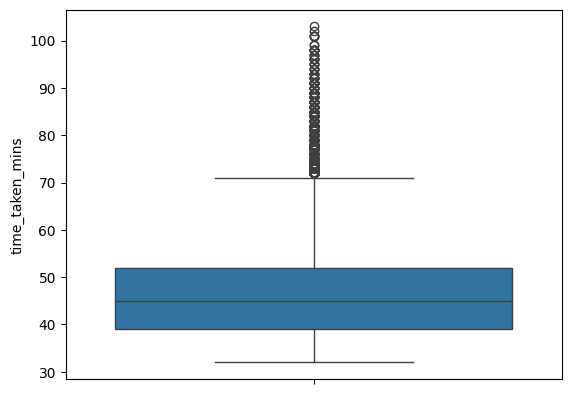

In [282]:
# Boxplot for time_taken
sns.boxplot(X_train['time_taken_mins'])
plt.show()


In [252]:
X_train.describe()

order_protocol    total_items       subtotal  num_distinct_items  \
count   123043.000000  123043.000000  123043.000000       123043.000000   
mean         1.912778       3.206082    2697.863625            2.674951   
std          1.512651       2.745043    1830.338637            1.625552   
min          0.000000       1.000000       0.000000            1.000000   
25%          0.000000       2.000000    1417.000000            2.000000   
50%          2.000000       3.000000    2220.000000            2.000000   
75%          3.000000       4.000000    3405.000000            3.000000   
max          6.000000     411.000000   26800.000000           20.000000   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   123043.000000          123043.000000       123043.000000   
mean      1160.434645              44.981177           41.879180   
std        562.955073              34.568806           32.149659   
min          0.000000              -3.000000           -4.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   

       total_outstanding_orders       distance     order_hour      isWeekend  \
count             123043.000000  123043.000000  123043.000000  123043.000000   
mean                  58.276651      21.830150       8.467251       0.345960   
std                   52.689697       8.765038       8.678470       0.475682   
min                   -6.000000       0.000000       0.000000       0.000000   
25%                   17.000000      15.320000       2.000000       0.000000   
50%                   41.000000      21.760000       3.000000       0.000000   
75%                   85.000000      28.120000      19.000000       1.000000   
max                  283.000000      83.520000      23.000000       1.000000   

       time_taken_mins  
count    123043.000000  
mean         46.192656  
std           9.332173  
min          32.000000  
25%          39.000000  
50%          45.000000  
75%          52.000000  
max         103.000000

<Axes: ylabel='subtotal'>

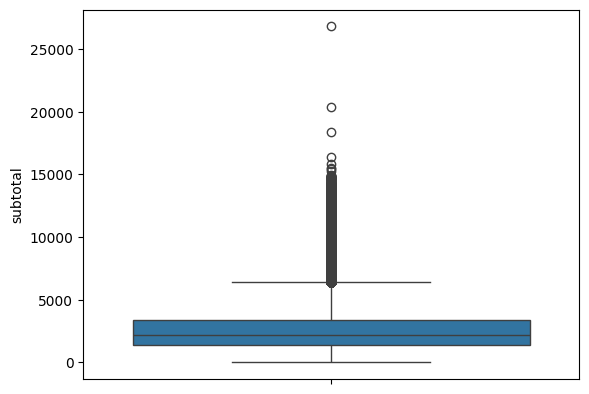

In [254]:
sns.boxplot(X_train['subtotal'])

<Axes: ylabel='total_items'>

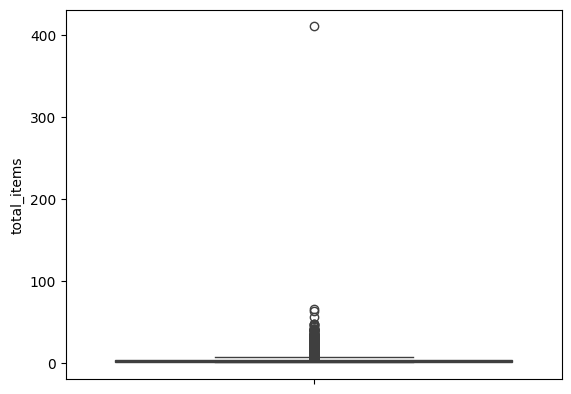

In [256]:
sns.boxplot(X_train['total_items'])
plt.show()

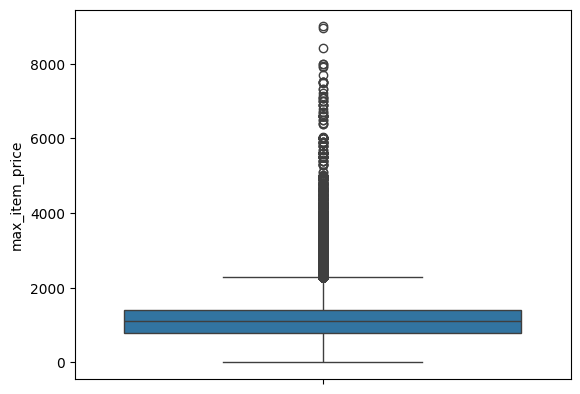

In [310]:
sns.boxplot(X_train['max_item_price'])
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [487]:
# Handle outliers
## Cn cap them 
##Removing the data which has time taken >80min as the data is not imacting teh study 
X_train=X_train[~(X_train['time_taken_mins']>80)]
X_train.reset_index()
y_train = (y_train>80)

In [286]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122742 entries, 94746 to 38408
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_protocol            122742 non-null  int8   
 1   total_items               122742 non-null  int64  
 2   subtotal                  122742 non-null  int64  
 3   num_distinct_items        122742 non-null  int64  
 4   max_item_price            122742 non-null  int64  
 5   total_onshift_dashers     122742 non-null  float64
 6   total_busy_dashers        122742 non-null  float64
 7   total_outstanding_orders  122742 non-null  float64
 8   distance                  122742 non-null  float64
 9   order_hour                122742 non-null  int32  
 10  isWeekend                 122742 non-null  int64  
 11  time_taken_mins           122742 non-null  float64
dtypes: float64(5), int32(1), int64(5), int8(1)
memory usage: 10.9 MB


In [405]:
X_train.describe()

level_0  order_protocol    total_items       subtotal  \
count  122292.000000   122292.000000  122292.000000  122292.000000   
mean    61295.499223        1.914197       3.188410    2670.563160   
std     35393.480278        1.512994       2.438257    1773.227799   
min         0.000000        0.000000       1.000000       0.000000   
25%     30639.750000        0.000000       2.000000    1404.000000   
50%     61294.500000        2.000000       3.000000    2201.000000   
75%     91943.250000        3.000000       4.000000    3396.000000   
max    122600.000000        6.000000      48.000000   13000.000000   

       num_distinct_items  max_item_price  total_onshift_dashers  \
count       122292.000000   122292.000000          122292.000000   
mean             2.667239     1148.465452              44.961755   
std              1.609391      520.111089              34.601765   
min              1.000000        0.000000              -3.000000   
25%              2.000000      799.000000              17.000000   
50%              2.000000     1085.000000              37.000000   
75%              3.000000     1395.000000              66.000000   
max             20.000000     4000.000000             171.000000   

       total_busy_dashers  total_outstanding_orders       distance  \
count       122292.000000             122292.000000  122292.000000   
mean            41.846646                 58.123696      21.810978   
std             32.168932                 52.594082       8.758500   
min             -4.000000                 -6.000000       0.000000   
25%             15.000000                 17.000000      15.320000   
50%             34.000000                 41.000000      21.720000   
75%             63.000000                 85.000000      28.080000   
max            154.000000                283.000000      68.440000   

          order_hour      isWeekend  time_taken_mins  
count  122292.000000  122292.000000    122292.000000  
mean        8.485731       0.346613        46.055899  
std         8.683113       0.475893         9.101076  
min         0.000000       0.000000        32.000000  
25%         2.000000       0.000000        39.000000  
50%         3.000000       0.000000        45.000000  
75%        19.000000       1.000000        52.000000  
max        23.000000       1.000000        80.000000

In [865]:
X_train=X_train[~(X_train['total_items']>50)]
X_train= X_train[~(X_train['subtotal']>13000)].reset_index()
X_train=X_train[~(X_train['max_item_price']>4000)].reset_index()
X_train=X_train.drop('level_0',axis=1)
X_train=X_train.drop('index',axis=1)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [375]:
# Define numerical and categorical columns for easy EDA and data manipulation
X_test.columns


Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend',
       'day_of_week', 'time_taken_mins'],
      dtype='object')

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [917]:
# Drop the weakly correlated columns from training dataset
X_test=X_test.drop(["market_id","store_primary_category","min_item_price","day_of_week"],axis=1)


KeyError: "['market_id', 'store_primary_category', 'min_item_price', 'day_of_week'] not found in axis"

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [869]:
# Import libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [871]:
# Apply scaling to the numerical columns - train
#scaler = MinMaxScaler()
scalar = StandardScaler()
num_vars =['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'time_taken_mins']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
y_train = X_train.pop('time_taken_mins')

In [873]:

# Apply scaling to the numerical columns - test
X_test[num_vars] = scaler.transform(X_test[num_vars])
y_test = X_test.pop('time_taken_mins')

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [875]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 7.588e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:31:31   Log-Likelihood:             2.0112e+05
No. Observations:              122587   AIC:                        -4.022e+05
Df Residuals:                  122575   BIC:                        -4.021e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [877]:
# Create/Initialise the model
lr_porter_1 = LinearRegression()


In [879]:
# Train the model using the training data
lr_porter_1.fit(X_train,y_train)

LinearRegression()

In [883]:
# Make predictions
y_pred = lr_porter_1.predict(X_test)

In [885]:
# Find results for evaluation metrics
r2_score(y_test,y_pred)

0.8741326854787286

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [523]:
X_train.columns

Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend'],
      dtype='object')

In [887]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5      total_onshift_dashers  34.43
6         total_busy_dashers  34.03
7   total_outstanding_orders  24.60
2                   subtotal  11.44
4             max_item_price   8.94
3         num_distinct_items   7.82
1                total_items   6.03
8                   distance   5.16
0             order_protocol   2.51
9                 order_hour   1.93
10                 isWeekend   1.55

In [889]:
## Dropping total_onshift_dashers very high vif
# Model 1
X_train_1 = X_train[['order_protocol','total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']]
X_test_1 = X_test[['order_protocol', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']]

In [891]:
# Add a constant to get an intercept
X_train_sm_1 = sm.add_constant(X_train_1)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm_1).fit()
print(lr.summary())

## Big drop in r2, try dropping another column

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                 3.125e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:32:13   Log-Likelihood:             1.5280e+05
No. Observations:              122587   AIC:                        -3.056e+05
Df Residuals:                  122576   BIC:                        -3.055e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [893]:
# Model2, Dropping total_busy dashers
X_train_2 = X_train[['order_protocol','total_items','subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']]
X_test_2 = X_test[['order_protocol','total_items','subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']]

In [895]:
# Add a constant to get an intercept
X_train_sm_2 = sm.add_constant(X_train_2)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm_2).fit()
print(lr.summary())
## Dropping total busy dasher as the r2 does not decrease much

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 6.985e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:32:26   Log-Likelihood:             1.9172e+05
No. Observations:              122587   AIC:                        -3.834e+05
Df Residuals:                  122576   BIC:                        -3.833e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [897]:
vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5     total_onshift_dashers  23.42
6  total_outstanding_orders  20.21
2                  subtotal  11.44
4            max_item_price   8.91
3        num_distinct_items   7.82
1               total_items   6.03
7                  distance   5.14
0            order_protocol   2.50
8                order_hour   1.93
9                 isWeekend   1.55

In [899]:
## Model 3, dropping subtotal
X_train_3 = X_train_2[['order_protocol','total_items' ,'num_distinct_items','total_outstanding_orders',
       'max_item_price', 'total_onshift_dashers', 'distance', 'order_hour', 'isWeekend']]
X_test_3 = X_test_2[['order_protocol', 'total_items','num_distinct_items','total_outstanding_orders',
       'max_item_price', 'total_onshift_dashers', 'distance', 'order_hour', 'isWeekend']]

X_train_sm_3 = sm.add_constant(X_train_3)
lr = sm.OLS(y_train, X_train_sm_3).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 6.852e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:32:38   Log-Likelihood:             1.8528e+05
No. Observations:              122587   AIC:                        -3.705e+05
Df Residuals:                  122577   BIC:                        -3.704e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [901]:
final_coef=lr.params
final_coef

const                       0.031099
order_protocol             -0.058639
total_items                 0.138384
num_distinct_items          0.306196
total_outstanding_orders    1.275292
max_item_price              0.156938
total_onshift_dashers      -1.072955
distance                    0.559591
order_hour                 -0.083769
isWeekend                   0.015364
dtype: float64

In [ ]:
## 83.3 is a god r2 so we keep this model as we have reached the required no.of variables

In [903]:
## Importong required RFE librarires
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Loop through the number of features and test the model
lm = LinearRegression()
lm.fit(X_train_3, y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train_3, y_train)

In [905]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('order_protocol', False, 5),
 ('total_items', False, 3),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('max_item_price', False, 2),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', False, 4),
 ('distance', False, 6)]

In [909]:
# Build the final model with selected number of features

lr_porter_fm = LinearRegression()
lr_porter_fm.fit(X_train_3,y_train)
y_pred = lr_porter_fm.predict(X_test_3)


## Evaluation
mse= mean_squared_error(y_test, y_pred)
rmse= mse ** 0.5
mae= mean_absolute_error(y_test, y_pred)
r2_square=r2_score(y_test,y_pred)
print("Final Model Results:\n")
print(f"MSE: {mse:.4f}, \nRMSE: {rmse:.4f}, \nMAE: {mae:.4f}, \nR-Square: {r2_square:.4f}")

Final Model Results:

MSE: 0.0028, 
RMSE: 0.0532, 
MAE: 0.0388, 
R-Square: 0.8353


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [913]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
y_train_time_taken_pred = lr_porter_fm.predict(X_train_3)


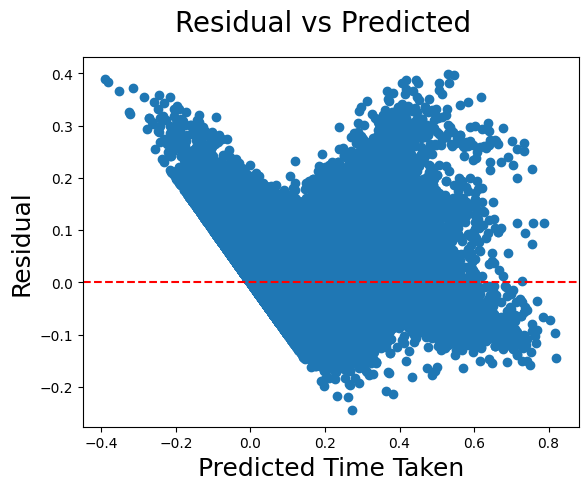

In [919]:
## Residual vs Predicted values plot

fig = plt.figure()
residual = y_train - y_train_time_taken_pred
plt.scatter(y_train_time_taken_pred,residual)
plt.axhline(y=0, color='r', linestyle='--')
fig.suptitle('Residual vs Predicted', fontsize = 20)                  # Plot heading 
plt.xlabel('Predicted Time Taken', fontsize = 18) 
plt.ylabel('Residual', fontsize = 18) 
plt.show()

Text(0.5, 0, 'Errors')

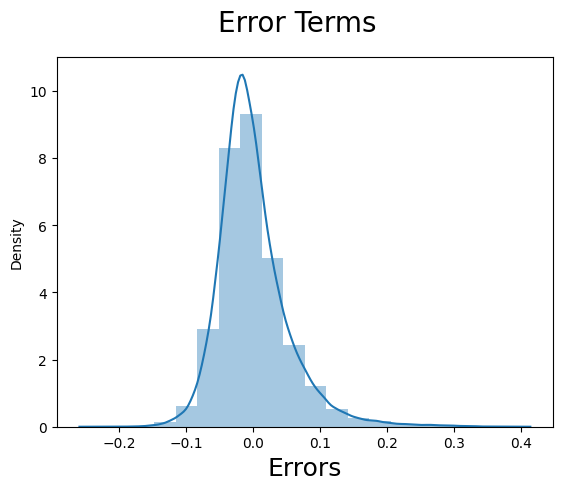

In [921]:
## Residual Histogram

fig = plt.figure()
sns.distplot((y_train - y_train_time_taken_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

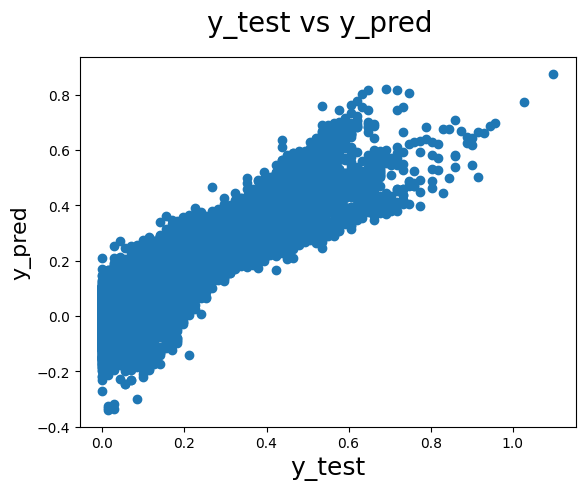

In [923]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

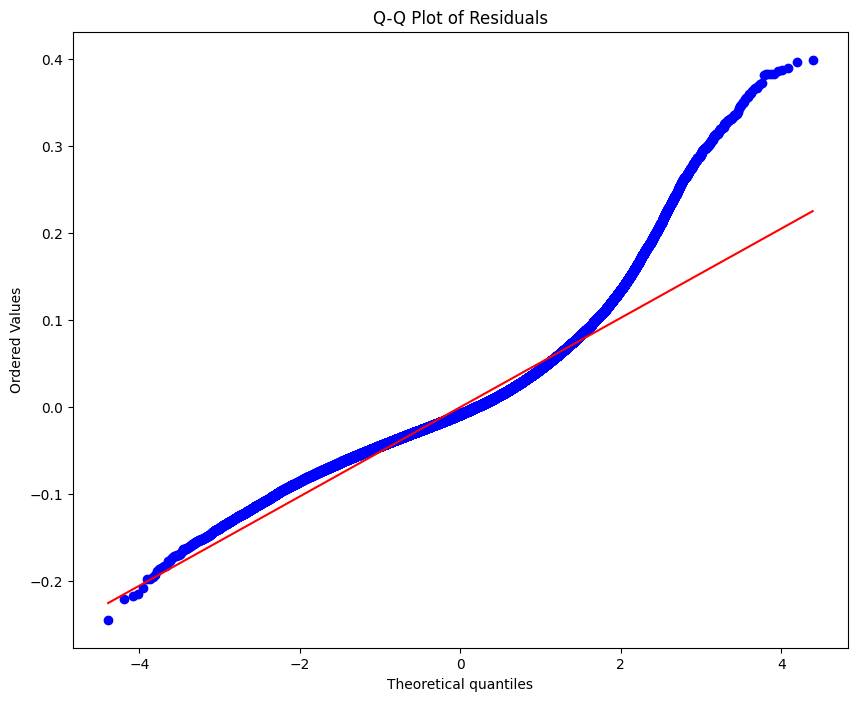

In [925]:
## Q- Q plot
import scipy.stats as stats

residuals = lr.resid
plt.figure(figsize=(10, 8))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [927]:
# Compare the scaled vs unscaled features used in the final model

#Extracting the Coef
coef_scaled = final_coef
coef_scaled = coef_scaled.drop('const')

# Extracting the features
final_features = X_train_3.columns

# Create dataframe
coef_df = pd.DataFrame({"Feature": final_features, "Scaled_Coef": coef_scaled})

# Separating categorical features
cat_features = X_train_3[['order_protocol']]

# Separating numerical features
num_features = [feature for feature in final_features if feature not in cat_features.columns]

# Calculate standard deviation
feature_sd = X_train_3[num_features].std()

#  Compute unscaled coefficients for numerical features
coef_df["Unscaled_Coef"] = np.nan
coef_df.loc[coef_df["Feature"].isin(num_features), "Unscaled_Coef"] = (
    coef_df.loc[coef_df["Feature"].isin(num_features), "Scaled_Coef"].values 
    / feature_sd.values
)

# Sort by absolute impact
#coef_df["Absolute Impact"] = np.abs(coef_df["Unscaled Coefficient"])
#coef_df = coef_df.sort_values(by="Absolute Impact", ascending=False)

# Display the coefficient comparison
print(coef_df[["Feature", "Scaled_Coef", "Unscaled_Coef"]])

                                           Feature  Scaled_Coef  Unscaled_Coef
order_protocol                      order_protocol    -0.058639            NaN
total_items                            total_items     0.138384       2.664060
num_distinct_items              num_distinct_items     0.306196       3.607455
total_outstanding_orders  total_outstanding_orders     1.275292       6.992267
max_item_price                      max_item_price     0.156938       1.205761
total_onshift_dashers        total_onshift_dashers    -1.072955      -5.398185
distance                                  distance     0.559591       5.331216
order_hour                              order_hour    -0.083769      -0.222011
isWeekend                                isWeekend     0.015364       0.032301


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [929]:
# Analyze the effect of a unit change in a feature, say 'total_items'

unit_change = 1  #  define unit change total_items

# Get the coefficient for 'total_items'
coef_total_items = coef_df.loc[coef_df["Feature"] == "total_items", "Scaled_Coef"].values[0]

impact_on_time_taken = round(unit_change * coef_total_items,2)

print("Impact of unit change in total_items is :", impact_on_time_taken)


Impact of unit change in total_items is : 0.14


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> The categorical variables and their impacted are as follows.
> <br>**isWeekend**: On weekedns its naturally the no. of orders are more comapred to weekday which would indicate that time taken for delivery s slightly higher.
> <br>**order_hour**: Late night hours delivery are slower indicating low no. of riders availability.
> <br>**Order protocols** : 3 and 6 have slightly fater delivery time than remaining order protocols.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> test_size=0.2 idnicates that for model building the training size is 80% while test size is 20%.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Distance has the highest correlation with the target variable i.e 0.46 or 46%.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> The approach to detect outlier was capping, checked for features which have very big gap between 75% and max value and capped the max value to certain value not impacting the analysis.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> The below are the features which are significantly impacting the delievry time

With high co-efficeinets for unscaled and scaled

    total_items     0.138384 | 2.664060
    max_item_price      0.156938 | 1.205761
    distance      0.559591 | 5.331216
    total_outstanding_orders     1.275292 | 6.992267



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
Linear regression is a simple and commonly used regression model. It assumes a linear relationship between a dependent variable (Y-axis) and one or more independent variables (X-axis). 

This is a *supervised machine learning algorithm* which models the relationship between a target variable (Y) and one or more independent features (X).

It demonstrartes the relationship between the target variable and features by fitting it into a linear relationship. It is helpful for perdicting continuous outcomes.

The Linear regression helps prreict the outcomes based on the provided inputs and the predictions are evaluated based on different metrics R^2, Mean Absolute Error, Root Mean Sqaured Error, etc.

The equation to fit the linear equation is as below:

y = β0 + β1X1 + β2X2 + ... + βnXn. (β1..βn are features, β0 is intercept,X1...Xn are features and y is the target or dependent variable)




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> **Simple Linear Regression** :
-  This deals with one independent feature(X) and one dependent variable(y).
-  This is based on asumption that variables have linear relationship that is change in X will cause change in Y.
-  Equation for SLR is y = β0 + β1X where y is the dependent or target variable, x is the feature, β1 is slope and β0 is intercept.

> **Multiple Linear Regression**
-  This deals with multiple features(X1,X2,X3...) and one dependednt varaible(y)
-  This provides more insights and helps evaluate a model based on multiple features.
-  Equation for MLR is y = β0 + β1X1 + β2X2 + ... + βnXn. (β1..βn are features, β0 is intercept,X1...Xn are features and y is the target or dependent variable)



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>



The cost function helps to measure the difference in predicted outcomes and actual data. Lower the cost function better the model. To minimize/optimise this we use techniques such as 
1. Normal Equation  2. Gradient Descent
---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Overfitting happens when the variance is very high between the training and test data, i.e it performs well with the training data but poorly with test data.
><br> Overfitting learns/memorize the training data and its fluctuation so well that it does not consider for unseen changes.

**Underfitting**
> Undrerfitting happens due to bias, due to multiple assumptions and when data is not enough to train the model. It does not do well either in training or test data.
> <br>Underfitting happens when the model is built for non linear data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
<br>The residual plots are used to plot the relationship between the predicted and the actual data. It helps to see if model is good enough to be considered.

 <br> Residual histogram shows minimum variance in test and actual data as it should be normalised and centered twoards 0.
<br> Q-Q plot demonstartes if there is any pattern in the residual . Random pattern sow sthat the model is a good fit.